In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
price_df = pd.read_csv("../../datastore/data.csv")
price_df.drop(columns=["Unnamed: 0", "Unused field, ignore"], inplace=True)
price_df

,Symbol,base,quote,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,ETHBTC,ETH,BTC,1669395600000,0.072026,0.072222,0.072026,0.072222,1342.1624,1669397399999,96.776126,2657,794.6663,57.298344
1,ETHBTC,ETH,BTC,1669397400000,0.072222,0.072335,0.072117,0.072162,1185.9640,1669399199999,85.640393,2727,560.9044,40.508977
2,ETHBTC,ETH,BTC,1669399200000,0.072163,0.072263,0.072101,0.072189,813.4793,1669400999999,58.717779,1862,359.8931,25.975732
3,ETHBTC,ETH,BTC,1669401000000,0.072188,0.072261,0.072161,0.072212,936.2168,1669402799999,67.599402,1816,470.6928,33.988586
4,ETHBTC,ETH,BTC,1669402800000,0.072223,0.072479,0.072197,0.072375,1115.5725,1669404599999,80.727099,3088,593.4310,42.945939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229157,BUSDRON,BUSD,RON,1670943600000,4.629000,4.630000,4.620000,4.621000,5984.0000,1670945399999,27672.337000,108,2086.0000,9651.160000
1229158,BUSDRON,BUSD,RON,1670945400000,4.620000,4.631000,4.620000,4.630000,3618.0000,1670947199999,16734.982000,42,1642.0000,7593.482000
1229159,BUSDRON,BUSD,RON,1670947200000,4.631000,4.631000,4.630000,4.631000,3254.0000,1670948999999,15069.018000,33,2998.0000,13883.738000
1229160,BUSDRON,BUSD,RON,1670949000000,4.630000,4.631000,4.630000,4.631000,14415.0000,1670950799999,66749.027000,92,7577.0000,35089.087000


### Heatmap thể hiện mức tương qua giữa Open price, High price, Low price, Close price

<AxesSubplot:>

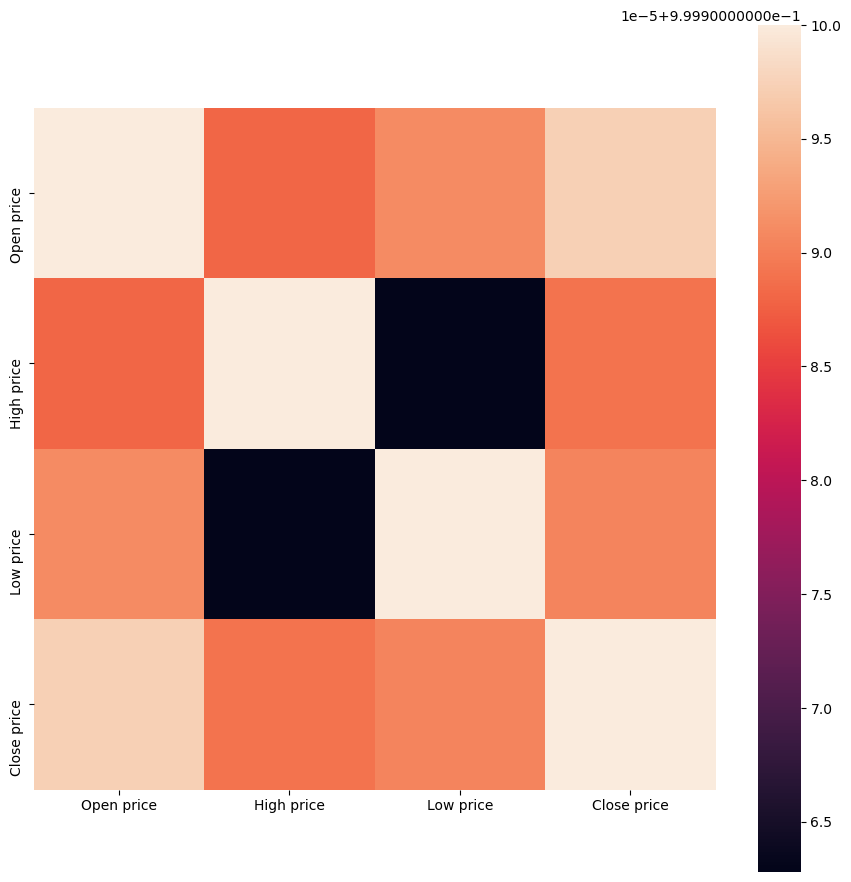

In [3]:
price_only_df = price_df[["Open price", "High price", "Low price", "Close price"]]
corr = price_only_df.corr()
plt.figure(figsize=(11, 11))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, square=True)

### Từ heatmap ta có thể thấy được giá open_price và close_price đều có tương quan cao đối với high_price và low_price
### Tuy nhiên, low_price ảnh hưởng nhiều tới open_price và close_price hơn là high_price

> Ta sẽ lấy BTCUSDT và các giá của nó để trực quan lên line chart

In [14]:
price_and_time_df = price_df.loc[price_df["Symbol"] == "BTCUSDT"].set_index("Kline open time")[["Open price", "High price", "Low price", "Close price"]]
price_and_time_df.index = pd.to_datetime(price_and_time_df.index, unit="ms")
price_and_time_df.sort_index(inplace=True)

In [15]:
price_and_time_df

,Open price,High price,Low price,Close price
Kline open time,,,,
2022-11-25 17:00:00,16485.14,16512.43,16474.29,16483.27
2022-11-25 17:30:00,16483.27,16536.35,16482.98,16510.38
2022-11-25 18:00:00,16509.52,16528.60,16502.77,16509.40
2022-11-25 18:30:00,16508.95,16518.59,16477.13,16495.43
2022-11-25 19:00:00,16495.43,16553.88,16494.01,16515.20
...,...,...,...,...
2022-12-13 15:00:00,17871.78,17887.41,17735.73,17762.98
2022-12-13 15:30:00,17762.98,17795.94,17731.00,17752.94
2022-12-13 16:00:00,17753.54,17819.84,17752.78,17796.48


In [16]:
fig = px.line(price_and_time_df, x=price_and_time_df.index, y=["Open price", "High price", "Low price", "Close price"])
fig.show()

### Với biểu đồ đường, ta cũng có thể thấy open_price và close_price có xu hướng gần với low_price hơn